In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 95% 88.0M/93.0M [00:00<00:00, 106MB/s] 
100% 93.0M/93.0M [00:00<00:00, 106MB/s]


In [7]:
!ls

apartment-rental-offers-in-germany.zip	kaggle.json  sample_data


In [8]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


In [9]:
data = pd.read_csv('/content/immo_data.csv')
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [12]:
mask = ((data.isna().sum()/len(data)) > 0.5)
data.columns[mask]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [13]:
data = data.drop(columns=data.columns[mask])
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [14]:
data.columns.size

42

In [15]:
data = data.drop(columns=['scoutId','heatingType','newlyConst','yearConstructed'
                          ,'firingTypes','yearConstructedRange','houseNumber','street'
                          ,'lift','description','facilities','date'])
data.shape

(268850, 30)

In [16]:
data._get_numeric_data().mean()

serviceCharge           151.206113
balcony                   0.616455
picturecount              9.791958
pricetrend                3.389001
telekomUploadSpeed       28.804928
totalRent               901.331522
hasKitchen                0.342407
cellar                    0.640636
baseRent                694.129432
livingSpace              74.355548
baseRentRange             3.765256
geo_plz               37283.022235
noRooms                   2.641261
thermalChar             114.749533
floor                     2.122405
numberOfFloors            3.572319
noRoomsRange              2.571542
garden                    0.196232
livingSpaceRange          3.070790
dtype: float64

In [17]:
data.fillna(data._get_numeric_data().mean(),inplace=True)

In [18]:
data.isna().sum()

regio1                     0
serviceCharge              0
telekomTvOffer         32619
balcony                    0
picturecount               0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
hasKitchen                 0
geo_bln                    0
cellar                     0
baseRent                   0
livingSpace                0
geo_krs                    0
condition              68489
interiorQual          112665
petsAllowed           114573
streetPlain            71013
baseRentRange              0
typeOfFlat             36614
geo_plz                    0
noRooms                    0
thermalChar                0
floor                      0
numberOfFloors             0
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio2                     0
regio3                     0
dtype: int64

In [19]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    up = data[col].mean() + 3*data[col].std()
    low = data[col].mean() - 3*data[col].std()
    mask = (data[col] > up ) | (data[col] < low )
    data = data.drop(data[mask].index)

In [20]:
y = data['livingSpace']

In [21]:
y.head()

0    86.00
1    89.00
2    83.80
3    58.15
4    84.97
Name: livingSpace, dtype: float64

In [22]:
for col in data.columns :
  if (data[col].dtype == 'int64' or data[col].dtype == 'float64') and (col !='livingSpace'):
    data[col] = (data[col] - min(data[col])) /(max(data[col]) - min(data[col]))

In [23]:
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,streetPlain,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,0.231678,ONE_YEAR_FREE,False,0.206897,0.605465,0.230769,0.012993,False,Nordrhein_Westfalen,True,0.015179,86.00,Dortmund,well_kept,normal,NaN,Schüruferstraße,0.375,ground_floor,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,True,0.500000,Dortmund,Schüren
1,Rheinland_Pfalz,0.126714,ONE_YEAR_FREE,True,0.275862,0.507259,0.230769,0.013941,False,Rheinland_Pfalz,False,0.020408,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,NaN,0.500,ground_floor,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,False,0.500000,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,0.241135,ONE_YEAR_FREE,True,0.275862,0.443211,0.035897,0.020108,False,Sachsen,True,0.024617,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,0.625,apartment,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,False,0.500000,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,0.054988,ONE_YEAR_FREE,True,0.310345,0.341588,1.000000,0.013941,False,Sachsen,False,0.008750,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Glück-Auf-Straße,0.125,other,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,False,0.166667,Mittelsachsen_Kreis,Freiberg
4,Bremen,0.130496,NaN,True,0.655172,0.421008,0.712947,0.013967,False,Bremen,False,0.019515,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,0.500,apartment,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,False,0.500000,Bremen,Neu_Schwachhausen


In [24]:
print(data.shape)
print(y.shape)

(259737, 30)
(259737,)


In [25]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    data[col] = data[col].fillna(data[col].value_counts().head(1).index[0])

In [26]:
data.isna().sum()

regio1                0
serviceCharge         0
telekomTvOffer        0
balcony               0
picturecount          0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
hasKitchen            0
geo_bln               0
cellar                0
baseRent              0
livingSpace           0
geo_krs               0
condition             0
interiorQual          0
petsAllowed           0
streetPlain           0
baseRentRange         0
typeOfFlat            0
geo_plz               0
noRooms               0
thermalChar           0
floor                 0
numberOfFloors        0
noRoomsRange          0
garden                0
livingSpaceRange      0
regio2                0
regio3                0
dtype: int64

In [27]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

regio1
Nordrhein_Westfalen       60791
Sachsen                   57199
Bayern                    20916
Sachsen_Anhalt            19818
Hessen                    17183
Niedersachsen             16106
Baden_Württemberg         15629
Thüringen                  8278
Rheinland_Pfalz            8171
Berlin                     7949
Brandenburg                6810
Mecklenburg_Vorpommern     6521
Schleswig_Holstein         6471
Hamburg                    3612
Bremen                     2905
Saarland                   1378
Name: regio1, dtype: int64
_______________________________
telekomTvOffer
ONE_YEAR_FREE    251339
NONE               4838
ON_DEMAND          3560
Name: telekomTvOffer, dtype: int64
_______________________________
balcony
True     159905
False     99832
Name: balcony, dtype: int64
_______________________________
hasKitchen
False    171865
True      87872
Name: hasKitchen, dtype: int64
_______________________________
geo_bln
Nordrhein_Westfalen       60791
Sachsen               

In [28]:
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    251339
NONE               4838
ON_DEMAND          3560
Name: telekomTvOffer, dtype: int64

In [29]:
others = list(data['telekomTvOffer'].value_counts().tail(2).index)
def edit_telekomTvOffer(a):
  if a in others:
    return 'others'
  return a
data['telekomTvOffer'] = data['telekomTvOffer'].apply(edit_telekomTvOffer)
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    251339
others             8398
Name: telekomTvOffer, dtype: int64

In [30]:
print(data['condition'].value_counts())

well_kept                             131037
refurbished                            26241
fully_renovated                        25477
first_time_use                         21067
mint_condition                         20954
modernized                             16551
first_time_use_after_refurbishment     14921
negotiable                              2177
need_of_renovation                      1308
ripe_for_demolition                        4
Name: condition, dtype: int64


In [31]:
others = list(data['condition'].value_counts().tail(3).index)
def edit_condition(a):
  if a in others:
    return 'others'
  return a
data['condition'] = data['condition'].apply(edit_condition)
data['condition'].value_counts()

well_kept                             131037
refurbished                            26241
fully_renovated                        25477
first_time_use                         21067
mint_condition                         20954
modernized                             16551
first_time_use_after_refurbishment     14921
others                                  3489
Name: condition, dtype: int64

In [32]:
print(data['interiorQual'].value_counts())

normal           188961
sophisticated     61972
luxury             6933
simple             1871
Name: interiorQual, dtype: int64


In [33]:
others = list(data['interiorQual'].value_counts().tail(2).index)
def edit_interiorQual(a):
  if a in others:
    return 'others'
  return a
data['interiorQual'] = data['interiorQual'].apply(edit_interiorQual)
data['interiorQual'].value_counts()

normal           188961
sophisticated     61972
others             8804
Name: interiorQual, dtype: int64

In [34]:
data['geo_krs'].unique().size

419

In [35]:
others = list(data['geo_krs'].value_counts().tail(400).index)
def edit_geo_krs(a):
  if a in others:
    return 'others'
  return a
data['geo_krs'] = data['geo_krs'].apply(edit_geo_krs)
data['geo_krs'].value_counts()

others                  167157
Leipzig                  13441
Chemnitz                 12421
Berlin                    7949
Dresden                   7378
Magdeburg                 4756
Halle_Saale               4493
München                   4202
Essen                     4188
Frankfurt_am_Main         4075
Hamburg                   3612
Düsseldorf                3569
Duisburg                  3430
Mittelsachsen_Kreis       3141
Dortmund                  3049
Gelsenkirchen             2828
Recklinghausen_Kreis      2634
Köln                      2600
Zwickau                   2489
Wuppertal                 2325
Name: geo_krs, dtype: int64

In [36]:
data['regio3'].unique().size

8615

In [37]:
data['regio2'].unique().size

419

In [38]:
data['streetPlain'].unique().size

53069

In [39]:
data = data.drop(columns=['regio2','regio3','streetPlain'])
data.shape

(259737, 27)

In [40]:
y.head()

0    86.00
1    89.00
2    83.80
3    58.15
4    84.97
Name: livingSpace, dtype: float64

In [41]:
cor_matrix = data.corr()

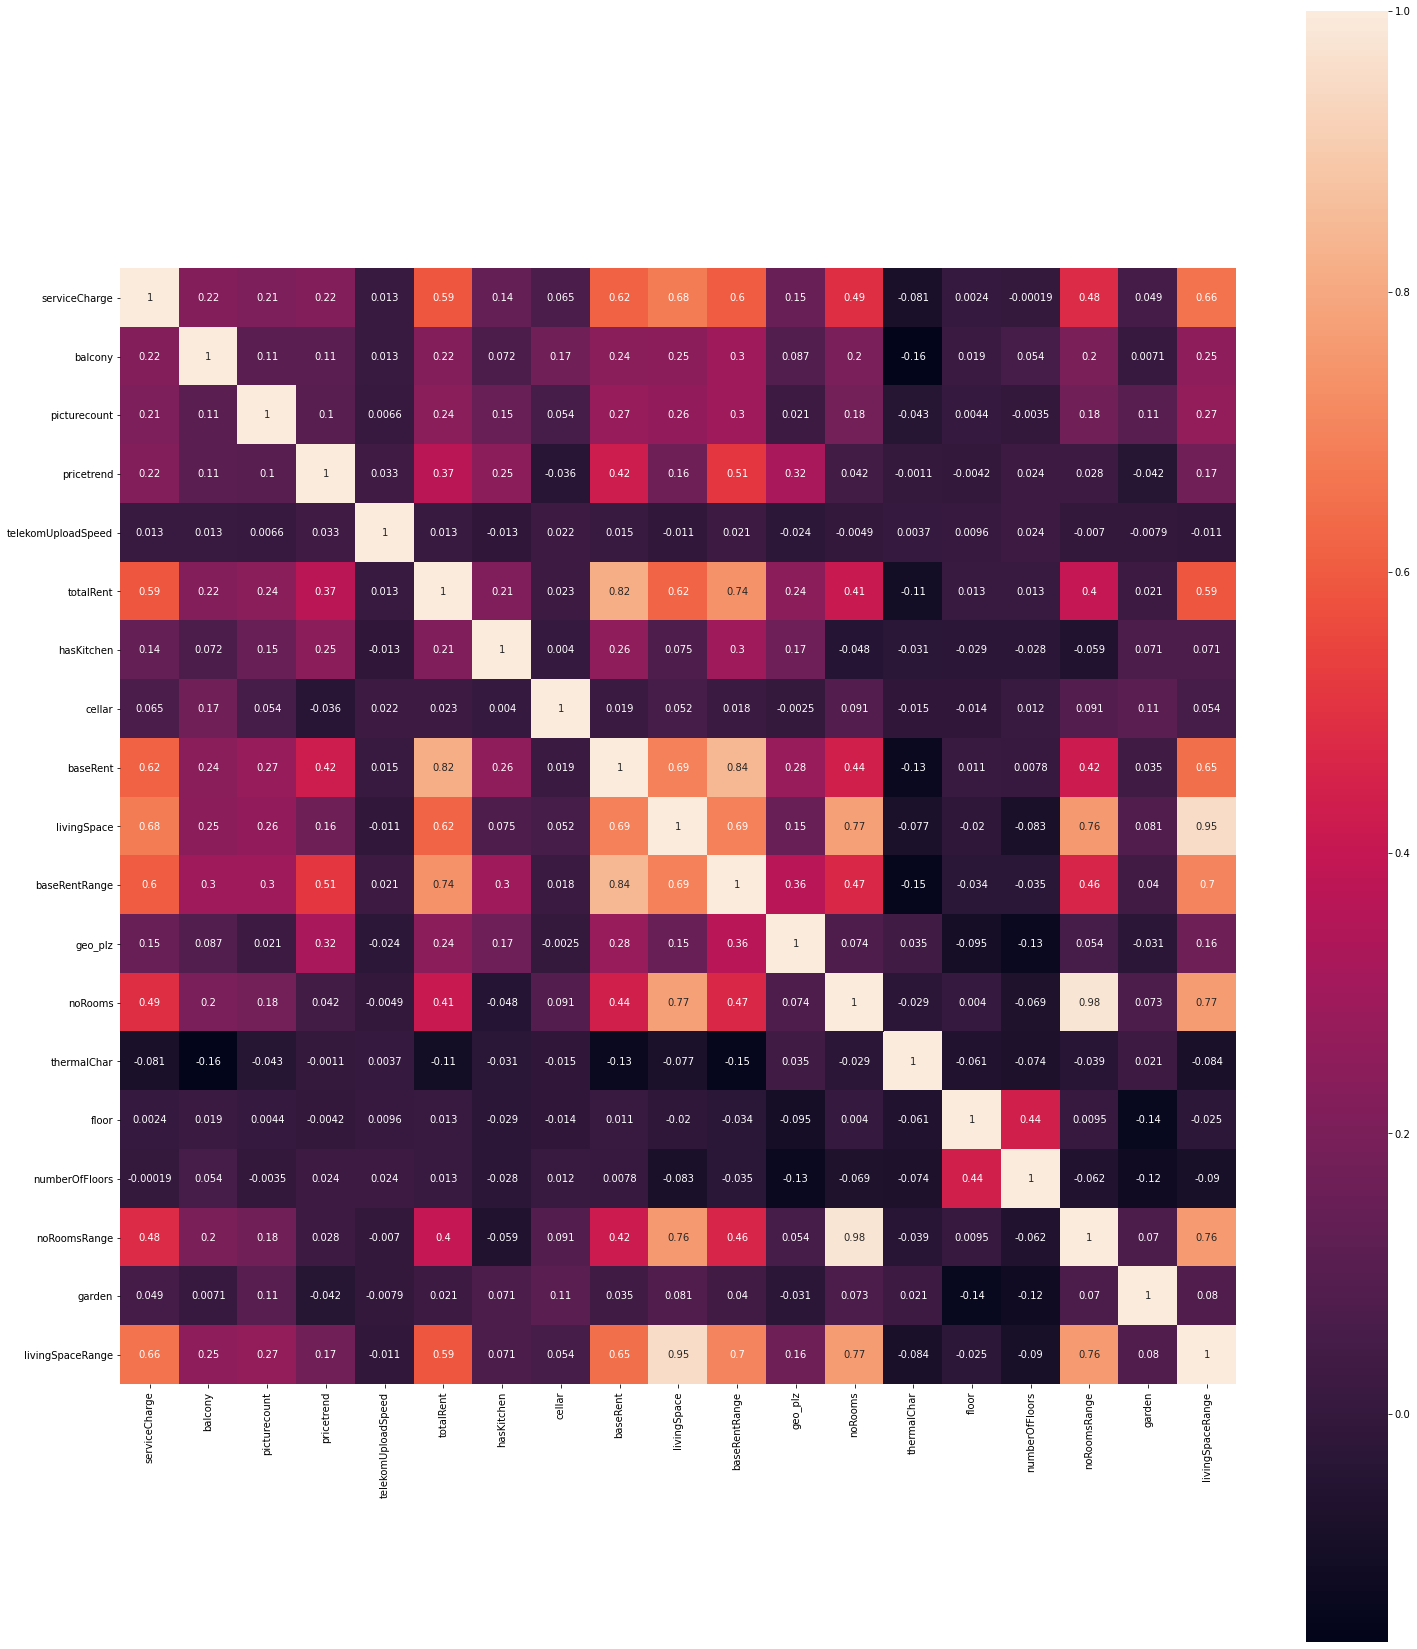

In [42]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

In [43]:
cate_features = []

for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    cate_features.append(col)

cate_features

['regio1',
 'telekomTvOffer',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'geo_krs',
 'condition',
 'interiorQual',
 'petsAllowed',
 'typeOfFlat',
 'garden']

In [44]:
dum_features = pd.get_dummies(data[cate_features])
dum_features.head()

,balcony,hasKitchen,cellar,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_others,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,geo_krs_Berlin,geo_krs_Chemnitz,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,False,False,True,True,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,True,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,True,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,True,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [45]:
data = pd.concat([data,dum_features],axis=1)
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,balcony,hasKitchen,cellar,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,Nordrhein_Westfalen,0.231678,ONE_YEAR_FREE,False,0.206897,0.605465,0.230769,0.012993,False,Nordrhein_Westfalen,True,0.015179,86.00,Dortmund,well_kept,normal,negotiable,0.375,ground_floor,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,True,0.500000,False,False,True,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Rheinland_Pfalz,0.126714,ONE_YEAR_FREE,True,0.275862,0.507259,0.230769,0.013941,False,Rheinland_Pfalz,False,0.020408,89.00,others,refurbished,normal,no,0.500,ground_floor,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,False,0.500000,True,False,False,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,Sachsen,0.241135,ONE_YEAR_FREE,True,0.275862,0.443211,0.035897,0.020108,False,Sachsen,True,0.024617,83.80,Dresden,first_time_use,sophisticated,negotiable,0.625,apartment,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,False,0.500000,True,False,True,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Sachsen,0.054988,ONE_YEAR_FREE,True,0.310345,0.341588,1.000000,0.013941,False,Sachsen,False,0.008750,58.15,Mittelsachsen_Kreis,well_kept,normal,negotiable,0.125,other,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,False,0.166667,True,False,False,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Bremen,0.130496,ONE_YEAR_FREE,True,0.655172,0.421008,0.712947,0.013967,False,Bremen,False,0.019515,84.97,others,refurbished,normal,negotiable,0.500,apartment,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,False,0.500000,True,False,False,False,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
data = data.drop(columns=cate_features)
data.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_others,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.231678,0.206897,0.605465,0.230769,0.012993,0.015179,86.00,0.375,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,0.500000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.126714,0.275862,0.507259,0.230769,0.013941,0.020408,89.00,0.500,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,0.500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.241135,0.275862,0.443211,0.035897,0.020108,0.024617,83.80,0.625,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.054988,0.310345,0.341588,1.000000,0.013941,0.008750,58.15,0.125,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0.130496,0.655172,0.421008,0.712947,0.013967,0.019515,84.97,0.500,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
data.shape

(259737, 93)

In [48]:
x = data.drop(columns=['livingSpace'])
print(x.shape)
print(y.shape)

(259737, 92)
(259737,)


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
print(xtrain.shape)
print(ytrain.shape)


print(xtest.shape)
print(ytest.shape)

(181815, 92)
(181815,)
(77922, 92)
(77922,)


In [314]:
ytest.head()

67473     40.0
258559    72.0
67004     70.0
163767    85.0
77978     73.5
Name: livingSpace, dtype: float64

In [315]:
ytrain.head()

41470     120.00
227255     78.00
190557     95.21
69117      59.00
238349     72.50
Name: livingSpace, dtype: float64

In [316]:
np.random.seed(42)
b = np.random.randn(92)
w = np.random.randn(92)
lr = 0.01
epochs = 500

lastloss = 0
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)
    
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain.iloc[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              


epoch 10  loss: 960.2222346299042
epoch 20  loss: 927.2289211398621
epoch 30  loss: 896.3199553945117
epoch 40  loss: 867.3118263985167
epoch 50  loss: 840.0397406034737
epoch 60  loss: 814.3556018841716
epoch 70  loss: 790.126214852564
epoch 80  loss: 767.231686499799
epoch 90  loss: 745.5640039786384
epoch 100  loss: 725.0257688439656
epoch 110  loss: 705.5290702853051
epoch 120  loss: 686.9944818548882
epoch 130  loss: 669.3501679373961
epoch 140  loss: 652.53108775495
epoch 150  loss: 636.4782860723556
epoch 160  loss: 621.1382609835304
epoch 170  loss: 606.4624002393698
epoch 180  loss: 592.4064785338691
epoch 190  loss: 578.9302090142957
epoch 200  loss: 565.9968430344223
epoch 210  loss: 553.5728128376446
epoch 220  loss: 541.6274124500812
epoch 230  loss: 530.132512589806
epoch 240  loss: 519.0623058651439
epoch 250  loss: 508.3930789496484
epoch 260  loss: 498.10300878937215
epoch 270  loss: 488.17198022440186
epoch 280  loss: 478.58142269716114
epoch 290  loss: 469.3141639770

In [317]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,60.652165
258559,72.0,68.583806
67004,70.0,74.337802
163767,85.0,74.632771
77978,73.5,67.223066


In [318]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.6030389363722697


In [319]:
np.random.seed(42)
b = np.random.randn(92)
w = np.random.randn(92)
lr = 0.01
epochs = 1000

lastloss = 0       
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)
    
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain.iloc[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 960.2222346299042
epoch 20  loss: 927.2289211398621
epoch 30  loss: 896.3199553945117
epoch 40  loss: 867.3118263985167
epoch 50  loss: 840.0397406034737
epoch 60  loss: 814.3556018841716
epoch 70  loss: 790.126214852564
epoch 80  loss: 767.231686499799
epoch 90  loss: 745.5640039786384
epoch 100  loss: 725.0257688439656
epoch 110  loss: 705.5290702853051
epoch 120  loss: 686.9944818548882
epoch 130  loss: 669.3501679373961
epoch 140  loss: 652.53108775495
epoch 150  loss: 636.4782860723556
epoch 160  loss: 621.1382609835304
epoch 170  loss: 606.4624002393698
epoch 180  loss: 592.4064785338691
epoch 190  loss: 578.9302090142957
epoch 200  loss: 565.9968430344223
epoch 210  loss: 553.5728128376446
epoch 220  loss: 541.6274124500812
epoch 230  loss: 530.132512589806
epoch 240  loss: 519.0623058651439
epoch 250  loss: 508.3930789496484
epoch 260  loss: 498.10300878937215
epoch 270  loss: 488.17198022440186
epoch 280  loss: 478.58142269716114
epoch 290  loss: 469.3141639770

In [320]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,53.194259
258559,72.0,69.513364
67004,70.0,75.173520
163767,85.0,79.652763
77978,73.5,68.090906


In [321]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.7399065732399066


In [322]:
np.random.seed(42)
b = np.random.randn(92)
w = np.random.randn(92)
lr = 0.1
epochs = 500

lastloss = 0
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)

    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss       

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain.iloc[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 5.6056101472049365e+20
epoch 20  loss: 3.697817352288477e+39


In [323]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,2.702380e+25
258559,72.0,2.709331e+25
67004,70.0,2.697507e+25
163767,85.0,2.681655e+25
77978,73.5,2.662402e+25


In [324]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.0


In [325]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.01
epochs = 500

lastloss = 0
for epoch in range(epochs):
    error = ytrain -((w*xtrain['livingSpaceRange']) + b)

    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss        

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = 0
    bgrad = 0
    
    wgrad = -1 * (xtrain['livingSpaceRange'] * error).mean()
    w = w - (lr * wgrad)
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 5199.488898514181
epoch 20  loss: 4279.324656416985
epoch 30  loss: 3544.066371291131
epoch 40  loss: 2956.3528588318763
epoch 50  loss: 2486.373911978956
epoch 60  loss: 2110.344172745131
epoch 70  loss: 1809.2854500255999
epoch 80  loss: 1568.0551433100363
epoch 90  loss: 1374.5710318213062
epoch 100  loss: 1219.1927416159228
epoch 110  loss: 1094.2282244528183
epoch 120  loss: 993.5399822795707
epoch 130  loss: 912.2308777344535
epoch 140  loss: 846.3934455277858
epoch 150  loss: 792.9098705251638
epoch 160  loss: 749.2923922827368
epoch 170  loss: 713.5559654360763
epoch 180  loss: 684.1166567066729
epoch 190  loss: 659.710576899672
epoch 200  loss: 639.3291975563033
epoch 210  loss: 622.1677407604402
epoch 220  loss: 607.5839998807435
epoch 230  loss: 595.0654830523285
epoch 240  loss: 584.2031972841388
epoch 250  loss: 574.6707310594005
epoch 260  loss: 566.2075645448857
epoch 270  loss: 558.6057529707058
epoch 280  loss: 551.6993014259884
epoch 290  loss: 545.355

In [326]:
ypred = (w * xtest['livingSpaceRange']) + b
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
67473,40.0,58.451555
258559,72.0,73.687835
67004,70.0,73.687835
163767,85.0,81.305975
77978,73.5,73.687835


In [327]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.46898180231513564


In [328]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.01
epochs = 5000
lastloss = 0
for epoch in range(epochs):
    error = ytrain -((w*xtrain['livingSpaceRange']) + b)
    
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = 0
    bgrad = 0
    
    wgrad = -1 * (xtrain['livingSpaceRange'] * error).mean()
    w = w - (lr * wgrad)
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 5199.488898514181
epoch 20  loss: 4279.324656416985
epoch 30  loss: 3544.066371291131
epoch 40  loss: 2956.3528588318763
epoch 50  loss: 2486.373911978956
epoch 60  loss: 2110.344172745131
epoch 70  loss: 1809.2854500255999
epoch 80  loss: 1568.0551433100363
epoch 90  loss: 1374.5710318213062
epoch 100  loss: 1219.1927416159228
epoch 110  loss: 1094.2282244528183
epoch 120  loss: 993.5399822795707
epoch 130  loss: 912.2308777344535
epoch 140  loss: 846.3934455277858
epoch 150  loss: 792.9098705251638
epoch 160  loss: 749.2923922827368
epoch 170  loss: 713.5559654360763
epoch 180  loss: 684.1166567066729
epoch 190  loss: 659.710576899672
epoch 200  loss: 639.3291975563033
epoch 210  loss: 622.1677407604402
epoch 220  loss: 607.5839998807435
epoch 230  loss: 595.0654830523285
epoch 240  loss: 584.2031972841388
epoch 250  loss: 574.6707310594005
epoch 260  loss: 566.2075645448857
epoch 270  loss: 558.6057529707058
epoch 280  loss: 551.6993014259884
epoch 290  loss: 545.355

In [329]:
ypred = (w * xtest['livingSpaceRange']) + b
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
67473,40.0,34.233866
258559,72.0,72.214154
67004,70.0,72.214154
163767,85.0,91.204298
77978,73.5,72.214154


In [330]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.8720515387182054


In [331]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.01
epochs = 5000
lastloss = 0
for epoch in range(epochs):
    error = ytrain -((w*xtrain['floor']) + b)
    
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = 0
    bgrad = 0
    
    wgrad = -1 * (xtrain['floor'] * error).mean()
    w = w - (lr * wgrad)
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 5300.25121328447
epoch 20  loss: 4465.821570750014
epoch 30  loss: 3792.4224490211723
epoch 40  loss: 3248.977157975533
epoch 50  loss: 2810.4063854375863
epoch 60  loss: 2456.470784911626
epoch 70  loss: 2170.836928120432
epoch 80  loss: 1940.3235159848584
epoch 90  loss: 1754.2930606153081
epoch 100  loss: 1604.1609643969862
epoch 110  loss: 1482.999340124958
epoch 120  loss: 1385.2172884568947
epoch 130  loss: 1306.3028774644508
epoch 140  loss: 1242.614916617348
epoch 150  loss: 1191.2149155506088
epoch 160  loss: 1149.7314725039475
epoch 170  loss: 1116.2508339436665
epoch 180  loss: 1089.228574687471
epoch 190  loss: 1067.4183225634708
epoch 200  loss: 1049.8142382366436
epoch 210  loss: 1035.6045956491569
epoch 220  loss: 1024.1343207998098
epoch 230  loss: 1014.8747600315836
epoch 240  loss: 1007.3992826269732
epoch 250  loss: 1001.3635917685016
epoch 260  loss: 996.4898352205606
epoch 270  loss: 992.5537824267969
epoch 280  loss: 989.3744762582718
epoch 290  lo

In [332]:
ypred = (w * xtest['floor']) + b
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
67473,40.0,72.293569
258559,72.0,72.293569
67004,70.0,72.129127
163767,85.0,76.159426
77978,73.5,70.785694


In [333]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred.values[i]<ytest.values[i]*1.15) and (ypred.values[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.31573881573881574


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [335]:
linearregg = LinearRegression()
linearregg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
ypred = linearregg.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
67473,40.0,33.519531
258559,72.0,76.727051
67004,70.0,70.493652
163767,85.0,89.216309
77978,73.5,70.854492


In [337]:
print(mean_squared_error(ypred,ytest))

65.99971656480648


In [338]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred[i]<ytest.values[i]*1.15) and (ypred[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.8860783860783861


In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(0.9)
x_pca = pca.fit_transform(x)
x_pca.shape

(259737, 31)

In [55]:
xtrain, xtest = train_test_split(x_pca,test_size=0.3, random_state=42)

In [56]:
np.random.seed(42)
b = np.random.randn(31)
w = np.random.randn(31)
lr = 0.01
epochs = 500

lastloss = 0       
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 897.7627599207945
epoch 20  loss: 862.3825286715968
epoch 30  loss: 836.4478560483559
epoch 40  loss: 811.9638857704922
epoch 50  loss: 788.8084426948412
epoch 60  loss: 766.8756287938926
epoch 70  loss: 746.0698913103153
epoch 80  loss: 726.3049236947604
epoch 90  loss: 707.5026895306295
epoch 100  loss: 689.5925532431163
epoch 110  loss: 672.5105057042528
epoch 120  loss: 656.1984741844673
epoch 130  loss: 640.6037072861429
epoch 140  loss: 625.6782265464117
epoch 150  loss: 611.3783373280894
epoch 160  loss: 597.6641924452117
epoch 170  loss: 584.4994027027041
epoch 180  loss: 571.8506891809338
epoch 190  loss: 559.6875726728795
epoch 200  loss: 547.9820961942511
epoch 210  loss: 536.7085769416733
epoch 220  loss: 525.8433844769837
epoch 230  loss: 515.3647422746004
epoch 240  loss: 505.2525500862552
epoch 250  loss: 495.48822485991593
epoch 260  loss: 486.0545582004767
epoch 270  loss: 476.93558858183997
epoch 280  loss: 468.11648671833456
epoch 290  loss: 459.58345

In [57]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,62.395253
258559,72.0,68.118409
67004,70.0,74.800537
163767,85.0,74.840551
77978,73.5,68.075377


In [58]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred[i]<ytest.values[i]*1.15) and (ypred[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.6026796026796026


In [59]:
pca = PCA(0.8)
x_pca = pca.fit_transform(x)
x_pca.shape

(259737, 21)

In [60]:
xtrain, xtest = train_test_split(x_pca,test_size=0.3, random_state=42)

In [61]:
np.random.seed(42)
b = np.random.randn(21)
w = np.random.randn(21)
lr = 0.01
epochs = 500

lastloss = 0       
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 1066.2887029093458
epoch 20  loss: 954.0962240777844
epoch 30  loss: 922.9851563740035
epoch 40  loss: 894.3882817580477
epoch 50  loss: 867.4488786821465
epoch 60  loss: 842.0223416030262
epoch 70  loss: 817.984230032822
epoch 80  loss: 795.2225763098678
epoch 90  loss: 773.6364931277981
epoch 100  loss: 753.1349844064939
epoch 110  loss: 733.6358883223675
epoch 120  loss: 715.0649372047071
epoch 130  loss: 697.3549211689735
epoch 140  loss: 680.4449438477596
epoch 150  loss: 664.2797598996016
epoch 160  loss: 648.8091851421703
epoch 170  loss: 633.987571191753
epoch 180  loss: 619.7733374078526
epoch 190  loss: 606.1285537543708
epoch 200  loss: 593.0185689094852
epoch 210  loss: 580.4116785944591
epoch 220  loss: 568.2788296584026
epoch 230  loss: 556.5933559571555
epoch 240  loss: 545.3307425100284
epoch 250  loss: 534.468414812718
epoch 260  loss: 523.9855505340457
epoch 270  loss: 513.8629111355115
epoch 280  loss: 504.082691227015
epoch 290  loss: 494.62838371689

In [62]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,63.067706
258559,72.0,67.911885
67004,70.0,74.045873
163767,85.0,76.040024
77978,73.5,68.364882


In [63]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred[i]<ytest.values[i]*1.15) and (ypred[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.5851749185082519


In [64]:
pca = PCA(0.98)
x_pca = pca.fit_transform(x)
x_pca.shape

(259737, 51)

In [65]:
xtrain, xtest = train_test_split(x_pca,test_size=0.3, random_state=42)

In [66]:
np.random.seed(42)
b = np.random.randn(51)
w = np.random.randn(51)
lr = 0.01
epochs = 500

lastloss = 0       
for epoch in range(epochs):
    error = ytrain - np.sum((w*xtrain) + b , axis = 1)
    loss = (error**2).mean()

    if abs(lastloss- loss)<0.01 :
      break
    
    lastloss = loss    

    if loss > 10**50 :
      break

    if (epoch+1) % 10 == 0:    
        print('epoch ' + str(epoch+1)+'  loss: ' + str(loss))
    
    wgrad = [0] * xtrain.shape[1]
    bgrad = 0
    
    for i in range(xtrain.shape[1]):
        wgrad[i] = -1 * (xtrain[:,i] * error).mean()
        w[i] = w[i] - (lr * wgrad[i])
        
    bgrad = -1 * error.mean()
    b = b - (lr*bgrad)
              

epoch 10  loss: 982.4554934620954
epoch 20  loss: 949.3609261903641
epoch 30  loss: 918.3271420286694
epoch 40  loss: 889.1572294231427
epoch 50  loss: 861.6911625366323
epoch 60  loss: 835.7851687965233
epoch 70  loss: 811.3099684872932
epoch 80  loss: 788.1492100548802
epoch 90  loss: 766.1980790772764
epoch 100  loss: 745.3620613676655
epoch 110  loss: 725.5558428907863
epoch 120  loss: 706.7023311344358
epoch 130  loss: 688.7317843175522
epoch 140  loss: 671.5810363561558
epoch 150  loss: 655.1928068742761
epoch 160  loss: 639.5150867565953
epoch 170  loss: 624.5005908125199
epoch 180  loss: 610.1062700717206
epoch 190  loss: 596.2928770743188
epoch 200  loss: 583.0245782656523
epoch 210  loss: 570.2686082682413
epoch 220  loss: 557.9949613912764
epoch 230  loss: 546.1761162577526
epoch 240  loss: 534.786789892894
epoch 250  loss: 523.8037180255361
epoch 260  loss: 513.2054587190587
epoch 270  loss: 502.97221676952614
epoch 280  loss: 493.0856865955754
epoch 290  loss: 483.52891159

In [67]:
ypred = np.sum((w*xtest) + b , axis = 1)
df = pd.DataFrame({'test':ytest,'predict':ypred})
df.head()

,test,predict
67473,40.0,60.541746
258559,72.0,68.783900
67004,70.0,73.492087
163767,85.0,75.967772
77978,73.5,67.826641


In [68]:
sum =0
N = len(ytest.values)
for i in range(N):
  if (ypred[i]<ytest.values[i]*1.15) and (ypred[i]>ytest.values[i]*0.85):
    sum = sum + 1
print('accuracy : ' + str(sum/N)) 

accuracy : 0.5949154282487615
